# Homework Rémi - Unsupervised Learning

### Exercice 3, chap 10 (p413)

###### a) 

In [1]:
#create the matrix to plot the observation
K = 2
n = 6
p = 2 
X = matrix(c(1,4,1,3,0,4,5,1,6,2,4,0), nrow = n, byrow = TRUE)

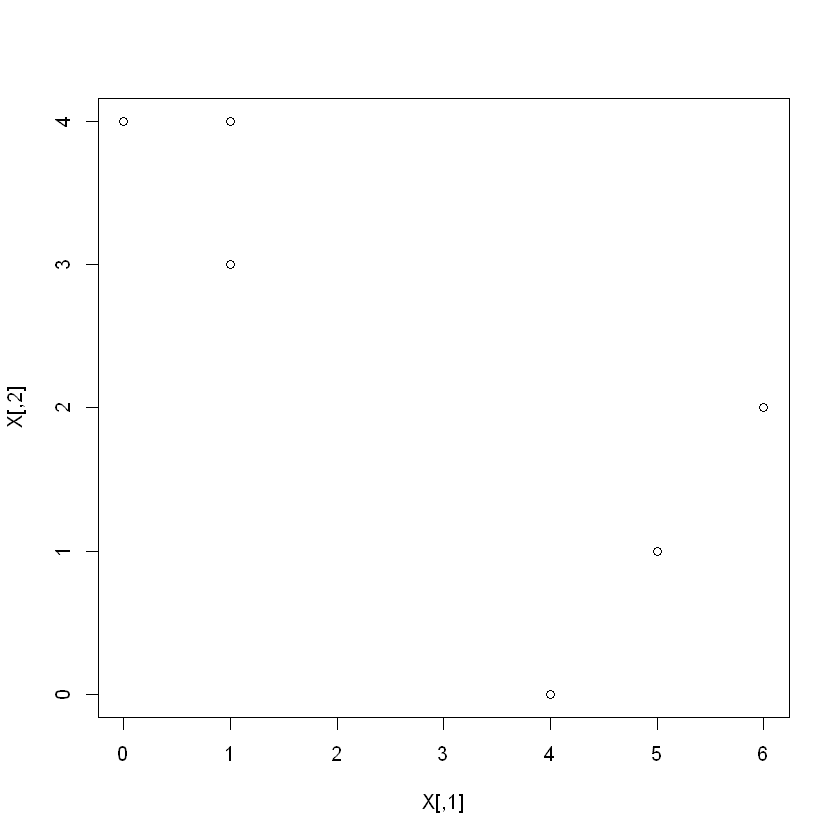

In [3]:
plot(X)

###### b)

In [ ]:
#assign cluster to each observation


In [5]:
set.seed(123)

cluster = sample(1:2, 6, replace = TRUE)
cluster

[1] 1 1 1 2 1 2

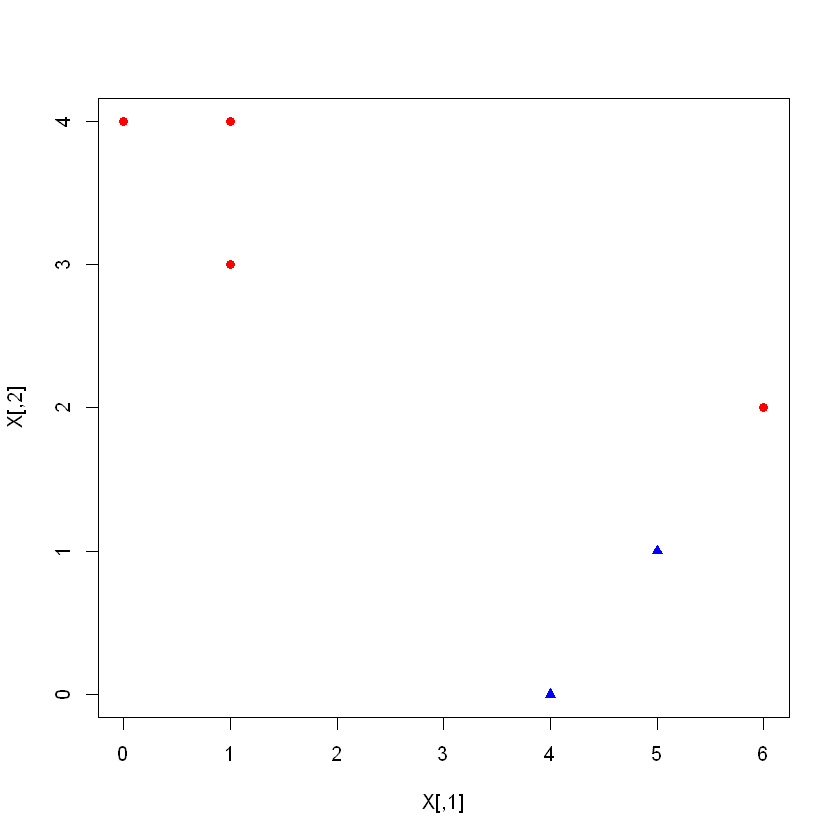

In [8]:
col = rep("red", 6)
col[cluster == 2] = "blue"
pch = rep(16, 6)
pch[cluster == 2] = 17
plot(X, col = col, pch = pch)

###### c)

In [9]:
#compute the centroids for each clusters 
centroids = aggregate(X, list(Clusters = cluster), mean)
centroids

Clusters,V1,V2
<int>,<dbl>,<dbl>
1,2.0,3.25
2,4.5,0.50


###### d)

In [11]:
#assign each observation to the closest centroids
library(class)


In [12]:
cluster_2 = knn(centroids[,2:3], X, factor(centroids[,1]))
cluster_2

[1] 1 1 1 2 2 2
Levels: 1 2

###### e)

In [15]:
#repeat the steps c and d until answers stop changing
centroids_2 = aggregate(X, list(Clusters = cluster_2), mean)
centroids_2

Clusters,V1,V2
<fct>,<dbl>,<dbl>
1,0.6666667,3.666667
2,5.0000000,1.000000


In [16]:
cluster_3 = knn(centroids_2[,2:3], X, factor(centroids_2[,1]))
cluster_3

[1] 1 1 1 2 2 2
Levels: 1 2

###### f)

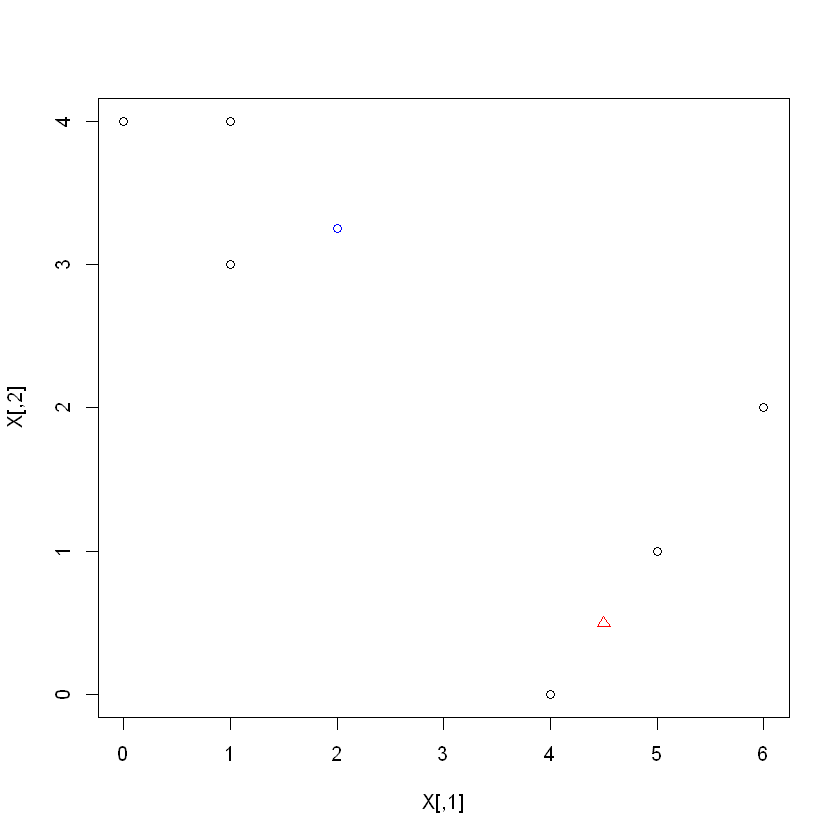

In [23]:
plot(X)
points(centroids[1,2:3], col = "blue")
points(centroids[2,2:3], col = "red", pch = 2)

### Exercice 8, chap 10 (p416)

###### a)

In [4]:
install.packages("data.table")
library(data.table)

package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rcolombier\AppData\Local\Temp\Rtmp4AbiJy\downloaded_packages


In [7]:
set.seed(123)
#create a table to work on it
table = data.table(USArrests)
head(table)

Murder,Assault,UrbanPop,Rape
<dbl>,<int>,<int>,<dbl>
13.2,236,58,21.2
10.0,263,48,44.5
8.1,294,80,31.0
8.8,190,50,19.5
9.0,276,91,40.6
7.9,204,78,38.7


In [10]:
#output the prcomp function
prcomp = prcomp(table, center = T, scale = T)

#select the standard deviation and square it to obtain the percentage of variance obtained
pve = prcomp$sdev^2 / sum(prcomp$sdev^2)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

### Exercice 9, chap 10 (p416)

###### a)

In [1]:
cluster_complete <- hclust(dist(USArrests, method = "euclidean"), method="complete")


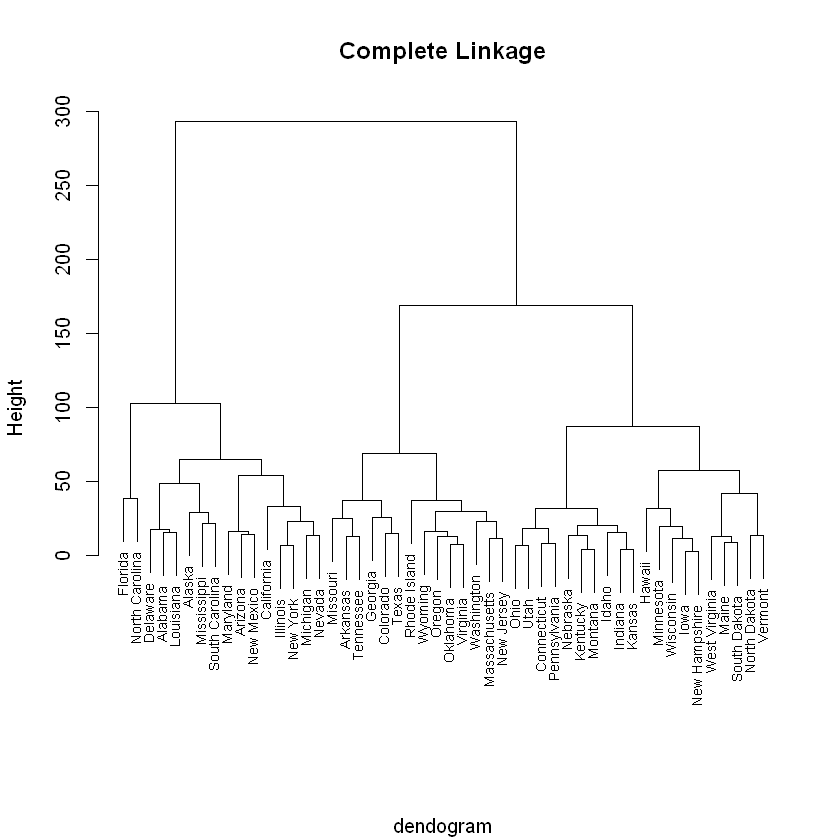

In [2]:
plot(cluster_complete,main="Complete Linkage", xlab="", sub="dendogram", cex=.7)

###### b) 

In [4]:
#cut the dendogramm at a height where there is 3 clusters
new_clusters = cutree(cluster_complete, 3)
new_clusters

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

###### c) 

In [7]:
#scale the variable
USArrests_scale = scale(USArrests)

#use complete linkage and euclidean distance
cluster_complete_2 = hclust(dist(USArrests_scale, method = "euclidean"), method = "complete")

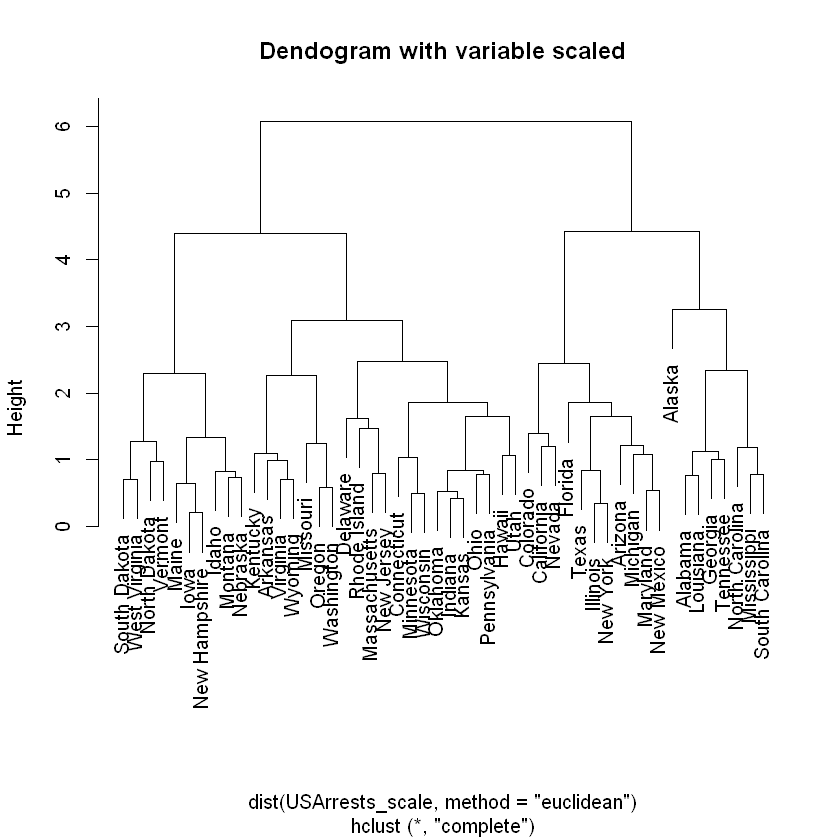

In [10]:
plot(cluster_complete_2, main = "Dendogram with variable scaled")

In [11]:
#see if we cut the dendogram now with variable scaled
scaled_clusters = cutree(cluster_complete_2, 3)
scaled_clusters

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

###### d)

It is very important to scale since there is some variable like urban population that are not the same unit as others variables like rape/Assault. So to have a complete contribution of all variable in the algorithm you need to scale. 

### Exercice 10, chap 10 (p417)

###### a)

In [14]:
# Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.
x = matrix(rnorm(20*3*50), ncol = 50)
head(x)

1.43594975,-0.2367026,0.7594296,-1.9637579,-0.76424860,0.07736735,0.2054884,-0.08919677,1.7592897,0.5459852,⋯,0.5677641,0.8763396,-1.1415870,1.00980224,-0.87920951,-0.3690684,0.3665009,0.2112606,1.1719338,-1.8354954
-0.09342323,-0.4706399,0.1313858,0.3719995,0.04659534,-1.03830286,0.2767151,-0.71823429,-0.4427624,0.4840570,⋯,1.6378328,0.5265309,0.2485459,0.04066970,0.26766731,0.6206934,0.9537710,-0.1036633,-0.5996660,-0.1242188
-0.34028103,0.3826494,-1.5739183,0.9157733,-0.35060137,0.69462459,-0.1773002,-0.29780053,-0.2994218,-0.6821096,⋯,1.9609245,-0.7760236,-0.6444134,-1.16763772,-0.57849646,0.5768988,1.1280423,-1.0549817,-1.4596819,0.1813765
-0.86237990,-1.4792986,0.6348984,-0.5162131,-0.01028067,3.03471094,-0.9262506,0.55107092,-0.5818162,0.6350656,⋯,1.4073898,-1.0000548,-1.4445373,0.06711774,-0.38254802,-1.2455860,-1.2898602,-0.4726655,-0.8851903,0.2148896
1.43938659,0.3531591,0.5383895,-0.2677233,-0.48529413,0.79832463,-0.7228658,-0.99481124,0.8655564,1.5066415,⋯,0.7853058,-0.3466519,0.0473442,0.47069220,0.08406167,-0.4825966,0.2231396,-0.1907298,-0.3944204,-1.3860252
-3.02890354,0.2712853,-0.3560129,0.4669485,0.49809822,-0.76240550,2.2467655,-0.88169424,0.3407590,-0.3843765,⋯,-1.4428994,-0.1697280,0.6475387,-0.91073137,-0.44382391,-1.4941484,-1.1595657,-0.1151177,-0.9655931,0.8111554


###### b)

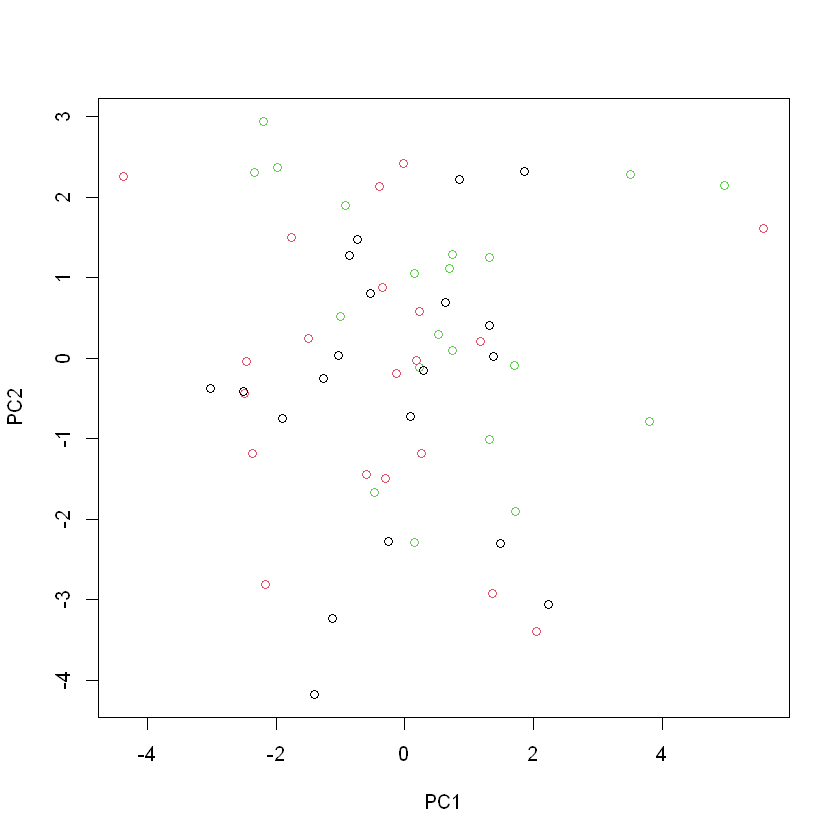

In [26]:
#Perform PCA 
pcr = prcomp(x)

#plot the results
plot(pcr$x[,1:2], col = 1:3, pch = 1)

###### c)

In [28]:
# Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?
kmeans = kmeans(x, 3)

###### d) 

In [ ]:
kmeans = kmeans(x, 3)